# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision: Practive of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset:
(101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

**NOTE:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet, what doesn't quite work), before scalling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-06-20 05:38:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 172.253.114.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   190MB/s    in 0.5s    

2023-06-20 05:38:21 (190 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jun 20 05:38 .
drwxr-xr-x 1 root root 4096 Jun 20 05:38 ..
drwxr-xr-x 4 root root 4096 Jun 20 05:38 test
drwxr-xr-x 4 root root 4096 Jun 20 05:38 train


In [ ]:
# Another way to find out how many images are tehr ein a file:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, firstlet's get the class names preogrammatically

In [ ]:
# Get the classnames programmatically:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/") # Turned training path into python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class names from the subdirectories in the training folder
# class_names = class_names[1:] # To use only if we get .DS_Store in one of the roots, above

print(class_names)

['pizza' 'steak']


In [ ]:
# Visualizing our images:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):             # target_dir (target directory)
  # Set up the target directory (we'll view images from here):
  target_folder = target_dir + target_class

  # Get a random image path:
  random_image = random.sample(os.listdir(target_folder), 1) # Randombly sampling 1 item from the items in here: os.listdir(target_folder)
  print(random_image)

  # Read in the image and plot it using matplotlib:
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")                         # Showing the shape of the image

  return img

['1897129.jpg']
Image shape: (512, 512, 3)


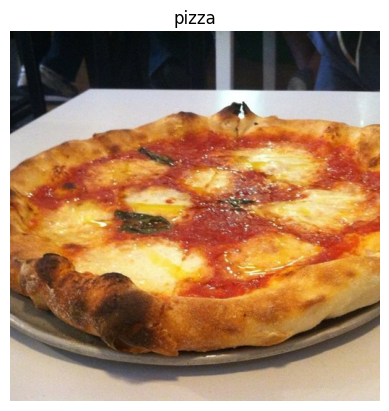

In [ ]:
# Viw random image from train dataset:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  9,  11,   8],
        [  9,  11,  10],
        [ 10,  12,  11],
        ...,
        [ 16,  25,  24],
        [ 15,  24,  23],
        [ 14,  23,  22]],

       [[  9,  11,  10],
        [  8,  10,   9],
        [  8,  10,   9],
        ...,
        [ 17,  26,  25],
        [ 18,  27,  26],
        [ 18,  27,  26]],

       [[  8,  10,   9],
        [  6,   8,   7],
        [  6,   8,   7],
        ...,
        [ 17,  26,  25],
        [ 19,  28,  27],
        [ 20,  29,  28]],

       ...,

       [[209, 199, 190],
        [210, 199, 193],
        [211, 200, 194],
        ...,
        [221, 209, 193],
        [223, 211, 197],
        [223, 211, 197]],

       [[211, 202, 193],
        [210, 201, 194],
        [210, 201, 194],
        ...,
        [223, 214, 197],
        [224, 215, 200],
        [222, 213, 198]],

       [[214, 205, 196],
        [213, 204, 197],
        [212, 203, 196],
        ...,
        [226, 217, 20

In [ ]:
# View the image shape
img.shape # It returns the width, height, and color channels i.e. (512, 512, 3)

(512, 512, 3)

**NOTE:** Many machine learning models, including neural networks, prefer to work with values between 0 and 1. That said, one of the most common processing steops for working with images is to scale, also known as normalization, their pixel values by dividing the image arrays by 255 (255, in this case, since the maximum pixel value for this image (img) is 255).

In [ ]:
# Since the shape of the image is 512, if we devide it by itself, 512, then our data gets normalized:
img/512.

array([[[0.01757812, 0.02148438, 0.015625  ],
        [0.01757812, 0.02148438, 0.01953125],
        [0.01953125, 0.0234375 , 0.02148438],
        ...,
        [0.03125   , 0.04882812, 0.046875  ],
        [0.02929688, 0.046875  , 0.04492188],
        [0.02734375, 0.04492188, 0.04296875]],

       [[0.01757812, 0.02148438, 0.01953125],
        [0.015625  , 0.01953125, 0.01757812],
        [0.015625  , 0.01953125, 0.01757812],
        ...,
        [0.03320312, 0.05078125, 0.04882812],
        [0.03515625, 0.05273438, 0.05078125],
        [0.03515625, 0.05273438, 0.05078125]],

       [[0.015625  , 0.01953125, 0.01757812],
        [0.01171875, 0.015625  , 0.01367188],
        [0.01171875, 0.015625  , 0.01367188],
        ...,
        [0.03320312, 0.05078125, 0.04882812],
        [0.03710938, 0.0546875 , 0.05273438],
        [0.0390625 , 0.05664062, 0.0546875 ]],

       ...,

       [[0.40820312, 0.38867188, 0.37109375],
        [0.41015625, 0.38867188, 0.37695312],
        [0.41210938, 0

from tensorflow.python.ops.gen_logging_ops import ImageSummary
## An end-to-end example:

Building a Convolutional Neural Network to find patterns, more specifically we need a way to:

* Load our images
* Preprocess our Images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit our CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed:
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, AKA normalization):
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32, # bacth_size = 32 is very common in DL
                                               target_size = (224, 224),  # We want to reshape them to 224, 224. This is because it's easier to work with.
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",  # REMEMBER: It's class_mode NOT class_model!!!
                                               seed = 42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website).
model_1 = tf.keras.Sequential([
    # 2 Conv2D layers:
    # INPUT LAYER
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)), # 224, 224 is the shape and the 3 is for color channels!
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    # 1 MaxPool2D layer:
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    # 2 Conv2D layers:
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),

    # 1 MaxPool2D layer:
    tf.keras.layers.MaxPool2D(2),

    # Flatten layer
    tf.keras.layers.Flatten(),
    # Dense & output layer:
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile our CNN model:
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']) # Since we're working with classification, 'accuracy' is a good metric to start with

# Fit the CNN model:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data, # valid_data: Our test_labels/data
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 472ms/step - loss: 0.6222 - accuracy: 0.6400 - val_loss: 0.5692 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4557 - accuracy: 0.7880 - val_loss: 0.4086 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4275 - accuracy: 0.8047 - val_loss: 0.3878 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 22s 462ms/step - loss: 0.4242 - accuracy: 0.8033 - val_loss: 0.3271 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.3662 - accuracy: 0.8373 - val_loss: 0.3113 - val_accuracy: 0.8800


**NOTE:** If the above cell takes longer than ~10 seconds per epoch, make sure to use a GPU!

In [ ]:
len(train_data)

47

In [ ]:
# This gives us the same as the length or our train_data OR len(train_data)

1500/32

# 1500, because our training data as seen above contains 1500 images
# 32, because we have a batch size of 32

### NOTE: We use batches, to make it easier for our computer memory to handle it, otherwise I'd might run out of memory! ###

46.875

In [ ]:
# Checking our model_1 summary:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**PRACTICE:** Compare our neural network with the CNN explainer website: https://poloclub.github.io/cnn-explainer/

## Using the same model as before (model_1) in another dataset

Replicating the model we previously built at the beginning of the previous section (03-neural_networks...), to see how and if it works with our data.

The model we're building below, is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,2&seed=0.64516&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [ ]:
# Improved model_2 (by significantly increasing number of neurons)
from keras.engine.sequential import input_layer
# Set random seed:
tf.random.set_seed(42)

# Creating model to replicate the TensorFlow Playground model:
model_2A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'), # Our model's accuracy increases drastically after increasing the Dense layers' number of neurons.
    tf.keras.layers.Dense(4, activation = 'relu'), # Our model's accuracy increases drastically after increasing the Dense layers' number of neurons.
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model:
model_2A.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit model:
history_2A = model_2A.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data,
                         validation_steps = len(valid_data))



Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 0.7118 - accuracy: 0.5087 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2A.summary()

In [ ]:
# Improved model_2 (by significantly increasing number of neurons)
from keras.engine.sequential import input_layer
# Set random seed:
tf.random.set_seed(42)

# Creating model to replicate the TensorFlow Playground model:
model_2B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = 'relu'), # Our model's accuracy increases drastically after increasing the Dense layers' number of neurons.
    tf.keras.layers.Dense(100, activation = 'relu'), # Our model's accuracy increases drastically after increasing the Dense layers' number of neurons.
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model:
model_2B.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit model:
history_2B = model_2B.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data,
                         validation_steps = len(valid_data))



In [ ]:
model_2B.summary()

#Binary classification (Break it down):

1. Become one with the data (VISUALIZE AS MUCH AND OFTEN AS NEEDED)
2. Preprocess the data (prepare it for a model by scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model (with test (label\valid) data)
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

## 1. Become one with the data:

In [ ]:
# Visualize data:

plt.figure()


plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak") # The first gives it the path, and the 2nd one gives it the label


plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza") # The first gives it the path, and the 2nd one gives it the label


## 2. Pre-process the data (prepare it for a model)

In [ ]:
# Define directory dataset paths:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

The next step consists of turning our data into **BATCHES**.

A batch is a small subset of data. Rather than looking at all 10k images at the same time, models might only just look at 32 at a time.

This is because:
1. Our processor (GPU) might not be able to handle 10k images (or more... potentially millions) at once.
2. Trying to look at patterns of 10k images in one shot, might result in the model not being able to learn very well.

WHY 32? **->** It's the industry standard.

In [ ]:
# Checking our NVIDIA GPU's aspects:
!nvidia-smi

##### Train-Test Split & Normalizing data:

In [ ]:
# Creating train & test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assigning train & test      &    Normalizing data
train_datagen = ImageDataGenerator(rescale = 1/255.) # This is basically saying: When the you load the images, then divide all pizel values by 255.
test_datagen = ImageDataGenerator(rescale = 1/255.)

##### Creating batches:

In [ ]:
# Load in our image data from our directories AND turn them into batches:
train_data = train_datagen.flow_from_directory(directory = train_dir,    # Target directory of images
                                               target_size = (224, 224), # Target size of images
                                               class_mode = 'binary',    # Type of data we're working with
                                               batch_size = 32)          # Size of minibatches to load our data into

test_data = test_datagen.flow_from_directory(directory = test_dir,       # Target directory of images
                                             target_size = (224, 224),   # Target size of images
                                             class_mode = 'binary',      # Type of data we're working with
                                             batch_size = 32)            # Size of minibatches to load our data into


In [ ]:
# Getting a sample of the train data batch:

images, labels = train_data.next() # Getting the "next" batch of images/labels in train_data
len(images), len(labels)           # The lengths are 32, because just right above we assigned batch_size to equal 32!

In [ ]:
# How many batches are there:
len(train_data)

In [ ]:
1500/32 # This is because we have 1500 training images and the size of the batch is 32

In [ ]:
images[:2], images[:2].shape

In [ ]:
images[7].shape

In [ ]:
# View the first batch of labels:
labels

# Creating a CNN model (starting with a baseline):

A baseline is a relatively simple model or existing result that is set up when begining a machine learning experiment, and then as you keep experimenting, you try to beat a baseline.

**NOTE:** In deep learning, there is almost infinite amount of architectures that can be created. Therefore, one of the best ways to get started is to start with something simple and see if it works on our data. Then introduce complexity as required. i.e. Which problem is performing best in the field for our problem.

In [ ]:
# Make the creating of our model a bit easier:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
from keras.layers.convolutional.base_separable_conv import Conv
# Create the model (This is our baseline: A layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters = 10,                  # The number of sliding windows going accross an input (higher = more complex model)
           kernel_size = 3,               # The size of the sliding window going across an input
           strides = 1,                   # The size of the step the sliding window takes across an input. In other words -> It compresses the output. This is good to increase if our images aren't too complex, if they are the lowest the better, since the model can understand it better!
           padding = 'valid',             # If padding is set to 'same', then output shape is same as input shape. If 'valid' the output shape gets compressed!
           activation = 'relu',           # We don't need to type tf.keras.layers ... because we have already imported it in the cell above!
           input_shape = (224, 224, 3)),  # Input Layer (specify input shape)

    Conv2D(10, 3, activation = 'relu'),   # The first number (10) is for filters, and the second one (3) is for the kernel size
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')      # Output layer     # VERY IMPORTANT!!!
])


3. Compile Model

In [ ]:
# Compile model:
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), # Since we have imported Adam, we can just write: optimizer = Adam()
                metrics = ['accuracy'])

In [ ]:
model_4.summary() # As it goes through the convolutional layers, it looses the edges (losses 2 pixels every time). This is because we set padding as "valid"!

4. Fit model

In [ ]:
# Check the lengths of training and test data generators:
len(train_data), len(test_data) # They are both in batches! (We set it before)

In [ ]:
# Fit model:
history_4 = model_4.fit(train_data, # This is a combination of labels and sample data, so we don't need to pass X and y
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

**PRACTICE:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes: https://poloclub.github.io/cnn-explainer/

In [ ]:
model_4.evaluate(test_data)

In [ ]:
model_1.evaluate(test_data)

### 5. Evaluate model:

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [ ]:
# Plot the validation and training curves seperately:
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss:
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy:
  plt.figure() # Every time we want a new figure, we have to write plt.figure() !!!
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**NOTE:** When a model's valuation loss starts to increase it's likely that the model is overfitting the training dataset. This means that it's learning the patterns in the dataset too well, and therefore the model's ability to generalize to unseen data gets diminished.

In [ ]:
# Check out the loss and accuracy of model_4:
plot_loss_curves(history_4)

**NOTE:** Ideally, the 2 loss curves (training and validation) will be very similar to each other (trining loss and validation loss decreasing at similar rates), when there are large differences, then our model may be overfitting!

-----------------------------------
### 6. Adjust the model parameters:

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add annother Dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers i.e. MaxPool2D
* Add more data...


**NOTE:** Reducing overfitting is also known as regularization!

--------------------------------------------
Reducing overfitting (regularization) with a MaxPool2D layer:*italicized text*

In [ ]:
# Create a model (this is going to be our new baseline)
model_5 = tf.keras.Sequential([                                                      # It can also be typed as model_5 = Sequential([])
    tf.keras.layers.Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),                                        # MaxPool2D gathers and identifies the most important data (pixels) into a bigger one.
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [ ]:
# Compile model:
model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Fit model:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch =len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
# Get a summary of our model with max pooling:
model_5.summary()

In [ ]:
model_4.summary()

As seen, model_5 has far less parameters than the previous model, model_4. But, model_5's ones are more the most important ones. It has reduced the noise.

In [ ]:
# Plot loss curves:
plot_loss_curves(history_5)

### Finding Data Augmentation:

In [ ]:
## Create ImageDataGenerator training instance with data augmentation:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,        # How much to rotate an image
                                             shear_range = 0.2,           # How much to shear an image (shear = make it distorted along an axis)
                                             zoom_range = 0.2,            # Zoom in randomly on an image
                                             width_shift_range = 0.2,     # Move image around on the x-axis
                                             height_shift_range = 0.2,    # Move image around on the y-axis
                                             horizontal_flip = True)      # Flipping an image. YES/NO?

# Creating ImageDataGenerator without data augmentation:
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Creating ImageDataGenerator without data augmentation -> for the TEST dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

What is data augmentation?

Data augmentation: Process of altering training data in order for it to have more diversity, which allows our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it, or something similar.

Let's write some code to visualize data augmentation below:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import data and augment it from training directory:
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,       # REMEMBER, standard industry size!
                                                                   class_mode = 'binary', # The default one is category
                                                                   shuffle = False)       # For demostration purposes only. It's set to true to bring as much randomness as possible

# Create non-augmented train data batches:
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

# Create non-augmented test data batches:
IMG_SIZE = (224, 224) # Creating a global variable so we don't have to re-type batch_size over and over

print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = "binary")



**NOTE:**
* Data augmentation is usually only performed on training data.
* Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories, but are modifies as they're loaded into the model.

Visualizing augmented data below:


In [ ]:
# Get sample data batches:
images, labels = train_data.next() # Non-augmented
augmented_images, augmented_labels = train_data_augmented.next() # Note: Lables aren not augmented, only data (images)!!!

In [ ]:
# Show original image and augmented image:
import random

random_number = random.randint(0, 32) # Our batch sizes are always 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

### Build model_6, but fit it with the augmented data

We've seen what augmented data looks like, now let's build a model and see how it performs:

In [ ]:
# Building model_6 and fitting it with augmented data:
import random
# Set random seed:
tf.random.set_seed(42)

# Create model:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model:
model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit model:
history_6 = model_6.fit(train_data_augmented,                        # It takes longer because it loads augmented data on the fly, as the model is fitting (learning patterns)
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented), # Make sure we use the same data!!! -> train_data_augmented
                        validation_data = test_data,
                        validation_steps = len(test_data))           # Make sure we use the same data!!! -> test_data

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Suffling our augmented data:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import data and augment it from training directory:
print("Augmented training data for model_7")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                     target_size = (224, 224),
                                                                     batch_size = 32,
                                                                     class_mode = 'binary',
                                                                     shuffle = True)

In [ ]:
# Model_7:
import random

# Set random seed:
tf.random.set_seed(42)

# Create model:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model:
model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit model:
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
# Plotting loss curves:
plot_loss_curves(history_7)

In [ ]:
model_5.evaluate(test_data) # Regularization (MaxPool2D) + Non-augmented data

In [ ]:
model_6.evaluate(test_data) # Regularization (MaxPool2D) + Augmented data

In [ ]:
model_7.evaluate(test_data) # Regularization (MaxPool2D) + Augmented data + Shuffled

**NOTE:** When shuffling training data, the model gets exposed to all different kinds of data during training, this enables it to learn features across a wide array of images (in our case, pizza & steak at the same time, instead of just pizza and then steak)

### 7. Repeat until satisfied

Since we've already beatten our baselines, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (i.e. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (i.e. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **Transfer Learning** to leverage what another image model has learned and sdjust it for our own use case

**PRACTICE: Recreate the model on the CNN explainer website (same as model_1) and see how it performs on the augmented suffled training data.

In [ ]:
# Copy the CNN explainer model, increase number of filters from 10 to 32/64 in the Conv2D layers. Maybe even add more layers (Conv2D/MaxPool2D)

### In this one we added 2 more hidden layers
import random
# Set random seed:
tf.random.set_seed(42)

# Create model:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation  = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model:
model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit model:
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
# Building the same model as model_8 but increasing the number of filters in the Conv2D layers:

import random
# Set random seed:
tf.random.set_seed(42)

# Create model:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model:
model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit model:
history_9 = model_9.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
# Building a model and letting it train for longer:

import random

# Set random seed:
tf.random.set_seed(42)

# Create model:
model_10 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation ='relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model:
model_10.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit model:
history_10 = model_10.fit(train_data_augmented_shuffled,
                          epochs = 20,
                          steps_per_epoch = len(train_data_augmented_shuffled),
                          validation_data = test_data,
                          validation_steps = len(test_data))

# Making a prediction with our trained model on our own custom data:

In [ ]:
# Classes we're working with:
print(class_names)

In [ ]:
# View our example image:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

# Plotting it:
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Checking the shape of our new image:
steak.shape

In [ ]:
steak

In [ ]:
tf.expand_dims(steak, axis = 0).shape

**NOTE:** When training a Neural Network, we want to make a prediction on our own custom data. It's important that our custom data (or new data) is preprocessed into the same format as the data our model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model:
def load_and_prep(filename, img_shape = 224):
  """
  Reads image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
  """
  # Read in the image:
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor:
  img = tf.image.decode_image(img)
  # Resize image:
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale image (get all values between 0 and 1 (BINARY!!!))
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image:
steak = load_and_prep("03-steak.jpeg")
steak

In [ ]:
# Expanding dimensions:
expanded_steak = tf.expand_dims(steak, axis = 0)

pred = model_7.predict(expanded_steak)
pred

Our custom image is being put through our model, however it currently ouputs a prediction probability. Let's visualize the image as well as the prediction!

In [ ]:
# Remind ourselves of our class names
class_names

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on our class names:
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  """ Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import target image:
  img = load_and_prep(filename)

  # Make a prediction:
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class:
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class:
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Test our model on a custom image:
pred_and_plot(model_7,
              "03-steak.jpeg")

Our model WORKS! Let's try on another image. PIZZA

In [ ]:
# Dowload another test custom image and make a prediction on it:
!weg https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_7, "03-pizza-dad.jpeg")

-------------------------------------------------------
# Multi-class classification
Going from Binary to Multi-class classification!

We've just been through a bunch of the following steps with a binary classification problem (pizza V.S. steak), now we'll step things up a notch with 10 classes of food (multi-class classification).


# This is formatted as code




* Become one with the data
* Preprocess the data (get it ready for a model)
* Create a model (start with a baseline)
* Fit the model (overfit it to make sure it works and learns)
* Evaluate the model
* Adjust different hyperparameters and improve the model (try to beat the baseline/reduce overfitting)
* Repeat until satisfied


In [ ]:
# 1. Import and become one with the data:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through 10 classes of food image data:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"): # WE must use the unziped file here!!!
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

In [ ]:
# Set up the train and test directories:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Getting the class names:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

In [ ]:
random.choice(class_names)

In [ ]:
# Visualize - visualize - visualize
import random

img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Pre-process the data (Prepare it for a model)

In [ ]:
# Creating the train & test data generator AND rescale the data:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assigning train & test     & Normalizing data:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# # Setting target_size as a global variable:
# IMG_SIZE = (224, 224)

# Turning data into batches (for both, train and test sets):
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),   # It could be changed, but normally this is a good size
                                               batch_size = 32,            # 32 is a good size for most computers' computer power
                                               class_mode = 'categorical' # We don't need to included it because the default one is categorical...
                                               )

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

In [ ]:
# Getting a sample of the training data batch we just created above:
images, labels = train_data.next() # Gets the next batch of images/labels
len(images), len(labels)

In [ ]:
# Getting the first 2 images:
images[:2], images[0].shape

In [ ]:
# Getting the first batch of labels (32)
labels

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_11 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_11.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

### 3. Creating a model (start with baseline)

Let's take the CNN explainer website's model and replicate it with our data (also 10 classes)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers.legacy import Adam # Adding it to fix the error
import random

# Setting random seed:
tf.random.set_seed(42)

# Create model (very similar to previous models but the exact same as the CNN explainer website):
model_12 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    # Activation(activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax') # We use softmax instead of sigmoid, since this is a multi-class classification problem!
])

# Compile model:
model_12.compile(loss = "categorical_crossentropy",
                 optimizer = Adam(),
                 metrics = ['accuracy'])

In [ ]:
# Fit model:
history_12 = model_12.fit(train_data,  # Now this data includes 10 classes!
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data=test_data,
                        validation_steps = int(0.25 *len(test_data))) # This makes it go through 25% of the test data, so we can speed it up!

In [ ]:
len(train_data)

In [ ]:
### 5. Evaluate model (on the test data):
model_11.evaluate(test_data)

In [ ]:
# Since we have 10 classes, guessing would be 1. So our model is performing better than just guessing!

In [ ]:
# Checking out model's loss curves on th e10 classes:
plot_loss_curves(history_11)

**It seems like our model is overfitting the training set quite badly!**

* It's getting great results on the training data, but performing poorly on the test set.

________________________________________________________
### 6. Adjust hyperparameters and improve model (try to beat baseline to: reduce overfitting))

Due to the performance in the training data, it's clear the model is learning something, but it's not performing well to unseen data (overfitting).

Let's try to fix overfitting:
* **Get more data** -> Get more diverse data.
* **Simplify the model** -> It might be too complicated i.e. too many layers, too many hidden units... (maybe it needs to learn more generalized patterns instead of specific patterns!).
* **Use data augmentation** ->  Manipulating the training data to add more diversity to it (without altering the original dataset)
* **Transfer leraning** -> Leverages the patterns another model has learned on similar data to our own. This allows us to use these patterns on our own dataset.

In [ ]:
# Trying to simplify our model:
# Getting 2 Convolutional leyers out of our model
model_12 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax') # 'softmax' because it's a multiclass classificatio!!!
])

# Compile model:
model_12.compile(loss = tf.keras.losses.categorical_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit model:
history_12 = model_12.fit(train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

In [ ]:
# Check out loss curves:
plot_loss_curves(history_12)

In [ ]:
model_11.summary()

In [ ]:
model_12.summary()

Our simplified model experiment didn't improve much.

* Trying data augmentation below:

### Trying to reduce overfitting with data augmentation:

* Reduce overfitting (getting the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
## Creating ImageDataGenerator training instance with data augmentation:
train_datagen_augmented2 = ImageDataGenerator(rescale = 1/255,
                                              rotation_range = 0.2,
                                              # shear_range = 0.2,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2,
                                              horizontal_flip = True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing data and augmenting it from training directory:
train_data_augmented2 = train_datagen_augmented2.flow_from_directory(train_dir,
                                                                     target_size = (224, 224),
                                                                     batch_size = 32,
                                                                     class_mode = 'categorical',
                                                                     #  shuffle = False
                                                                     )

In [ ]:
# Creating model_13 with augmebted training data of 10 classes

# Instead of rewritting the whole model, we can clone it!
model_13 = tf.keras.models.clone_model(model_11)

# Compile clone model (using the same setup as previous models):
model_13.compile(loss = tf.keras.losses.categorical_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit model:
history_13 = model_13.fit(train_data_augmented2,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented2), # It takes longer because it augments the data as it fits the model (it doesn't modify the original data)
                          validation_data = test_data,
                          validation_steps = len(test_data))

In [ ]:
model_11.evaluate(test_data)

In [ ]:
model_13.evaluate(test_data)

In [ ]:
# Check out model_13's (trained on augmented data) loss curves:
plot_loss_curves(history_13)

The loss curves are much closer to each other than in the baseline model, and heading the right direction.

* It seems like if we were to train the model for longer its performance would keep improving!

### 7. Repeat until satisfied:

We could: Keep going -> continually trying to bring the loss curves closer together & improve the validation/test accuracy.

By:
* Running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden layers).
- Adjusting the learning rate.
- Trying different methods of data augmentation (adjusting the hyperparameters in our ImageDataGenerator instance).
- Train for longer i.e. 10 epochs.
- Try **Transfer Learning**

### Make a prediction with our trained model:

Using our trained model to make predictions on our own custom images

In [ ]:
class_names

In [ ]:
# Downloading custom images:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


In [ ]:
list(class_names)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Make a prediction using model_13:
pred_and_plot(model = model_13,
              filename = "03-hamburger.jpeg",
              class_names = list(class_names))

In [ ]:
# Make a prediction using model_13:
pred_and_plot(model = model_13,
              filename = "03-sushi.jpeg",
              class_names = list(class_names))

In [ ]:
# Make a prediction using model_13:
pred_and_plot(model = model_13,
              filename = "03-steak.jpeg",
              class_names = list(class_names))

In [ ]:
# Make a prediction using model_13:
pred_and_plot(model = model_13, # Trained on pizza V.S. steak
              filename = "03-pizza-dad.jpeg",
              class_names = list(class_names))

It seems like model_13 didn't perform well on our custom images. This is because it achieved only 37% accuracy on the test data.
Therefore we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [ ]:
# Save model:
model_13.save("saved_trained_model_13")

NameError: ignored

In [ ]:
# Load in a trained model and evaluate it:
loaded_model_13 = tf.keras.models.load_model("saved_trained_model_13")
loaded_model_13.evaluate(test_data)

In [ ]:
# Compare our loaded model with our existing model (These should have teh same results if saved and loaded well):
model_13.evaluate(test_data)

# Extra-curriculum exercices:

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/README.md#-03-computer-vision--convolutional-neural-networks-in-tensorflow-exercises

In [ ]:
# Checking our NVIDIA GPU's aspects:
!nvidia-smi

Tue Jun 27 19:28:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers


### Loading the dataset: 'tf_flowers'

In [ ]:


 (train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',                                            # Dataset name
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],  # Train-validation-test split. The split ratios are 80%, 10%, and 10% respectively
    with_info=True,                                          # Load metadata (loading additional metadata about the dataset)
    as_supervised=True,                                      # Load data as supervised
    )

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
num_classes = metadata.features['label'].num_classes
num_classes

5

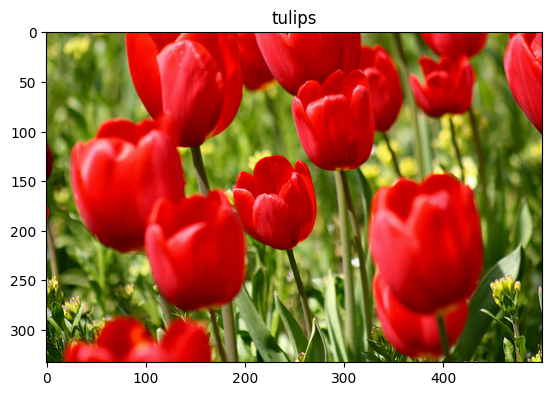

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Retrieving image and label from dataset:
image, label = next(iter(train_ds))

# Retrieve label name using metadata:
get_label_name = metadata.features['label'].int2str

# Displaying the image and its corresponding label:
plt.imshow(image)
plt.title(get_label_name(label))
plt.show()

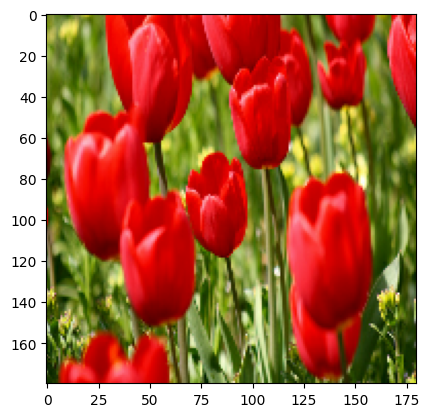

In [ ]:
# Resizing images by using: Keras processing layers:

IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.Rescaling(1./255)
])


# Visualizing rescaled images:
result = resize_and_rescale(image)

plt.imshow(result)
plt.show()

In [ ]:
# Verifying the pixels are in the [0, 1] range:
print('Min and Max pixel values:', result.numpy().min(), result.numpy().max())

Min and Max pixel values: 0.0 1.0


In [ ]:
# Creating a few processing layers, applying them repeatedly to the same image:

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
# Adding the image to a batch:
image = tf.cast(tf.expand_dims(image, 0), tf.float32)


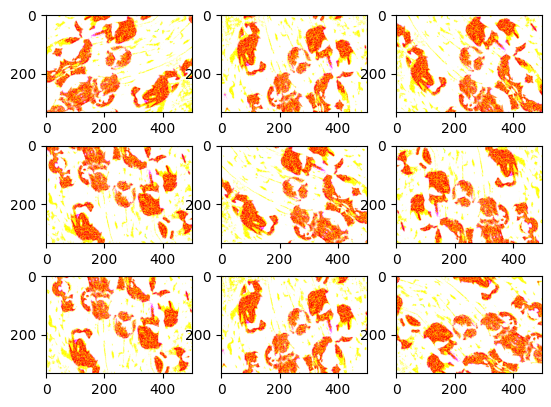

In [ ]:

for i in range(9):

  # Remove extra dimensions
  image = tf.squeeze(image)
  # Apply data augmentation
  augmented_image = data_augmentation(image)  # Replace 'data_augmentation' with the actual function or code for augmenting the image

  # Display the augmented image
  ax = plt.subplot(3, 3, i + 1) # This creates a subplot within a grid layout, displaying multiple images. The 1st num (3) -> Num of rows for grid, 2nd num -> Num of columns, 3rd argument -> the position of the current subplot within the grid
  plt.imshow(augmented_image)


In [ ]:
# Including these processing layers in our model:
model = tf.keras.Sequential([
    # Adding processing layers:
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), # 16 (kernel size), 3 (strides)
    tf.keras.layers.MaxPool2D()
])

In [ ]:
# Adding the processing layers to our dataset:
aug_ds = train_ds.map(
    lambda x, y: (resize_and_rescale(x, training = True), y)
)

# Applying the processing layers to the datasets

In [ ]:
from tensorflow.python.data.ops.dataset_ops import AUTOTUNE
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle = False, augment = False):

  # Resizing and rescaling all datasets:
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls = AUTOTUNE)
  if shuffle:
    ds = ds.shuffle(1000)

    # Batch all datasets:
    ds = ds.batch(batch_size)

    # Use data augmentation only on the training set:
    if augment:
      ds = ds.map(lambda x, y:(data_augmentation(x, training = True), y),
                  num_parallel_calls = AUTOTUNE)

    # Using buffered prefetching on all datasets:
    return ds.prefetch(buffer_size = AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds, shuffle = True, augment = True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [ ]:
import random
# Random seed:
tf.random.set_seed(42)

# creating model2
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes) # Softmax because it's a multi-class classification problem
])

# Compile model:
model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])



In [ ]:
history2 = model2.fit(train_ds, epochs = 5, validation_data = val_ds)


Epoch 1/5
92/92 [==============================] - 7s 57ms/step - loss: 1.2744 - accuracy: 0.4489
Epoch 2/5
92/92 [==============================] - 5s 51ms/step - loss: 1.1026 - accuracy: 0.5634
Epoch 3/5
92/92 [==============================] - 6s 57ms/step - loss: 1.0300 - accuracy: 0.5906
Epoch 4/5
92/92 [==============================] - 5s 51ms/step - loss: 0.9583 - accuracy: 0.6209
Epoch 5/5
92/92 [==============================] - 6s 55ms/step - loss: 0.9276 - accuracy: 0.6328


In [ ]:
import tensorflow as tf

def random_invert_img(x, p=0.5):
    if tf.random.uniform([]) < p:
        x = tf.subtract(255, x)
    return x


In [ ]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

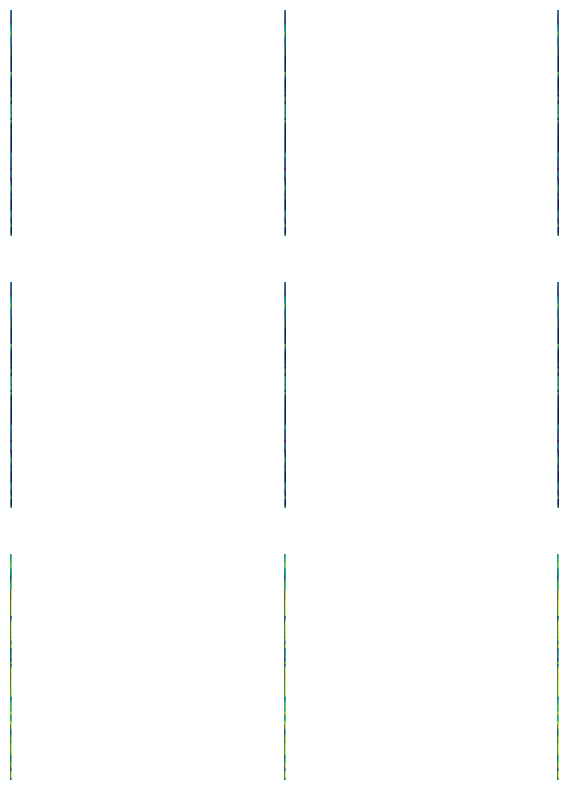

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

In [ ]:
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)

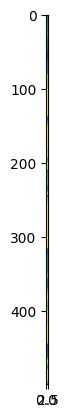

In [ ]:
_ = plt.imshow(RandomInvert()(image)[0])